In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\shara\Downloads\Email_Spam_DS\spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### DATA CLEANING

In [5]:
#dropped last 3 unwanted cols
#df.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , axis = 1 , inplace = True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#renaming the cols
df.rename(columns = {'v1' : 'target' , 'v2' : 'text'} , inplace = True)
df.sample(10)

,target,text
5132,ham,it's still not working. And this time i also t...
5001,ham,You still around? Looking to pick up later
4704,ham,Hey anyway i have to :-)
3688,ham,You still coming tonight?
4232,ham,My love ... I hope your not doing anything dra...
3484,ham,No:-)i got rumour that you going to buy apartm...
5036,ham,(You didn't hear it from me)
1998,ham,"Well, I have to leave for my class babe ... Yo..."
3390,ham,"I'm in a meeting, call me later at"
2912,ham,Kindly send some one to our flat before &lt;D...


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(10)

,target,text
4991,0,I'm hungry buy smth home...
2737,0,Hi Chachi tried calling u now unable to reach ...
1475,0,Nice. Wait...should you be texting right now? ...
161,0,New car and house for my parents.:)i have only...
4980,0,I said its okay. Sorry
5415,0,You should get more chicken broth if you want ...
2858,0,Do you know why god created gap between your f...
3183,0,Good morning pookie pie! Lol hope I didn't wak...
4849,0,Maybe you should find something else to do ins...
2132,1,Your B4U voucher w/c 27/03 is MARSMS. Log onto...


In [10]:
##finding missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#finding duplicate data
df.duplicated().sum()

#removing duplicates
df = df.drop_duplicates(keep = "first")
df.duplicated().sum()

0

<Axes: >

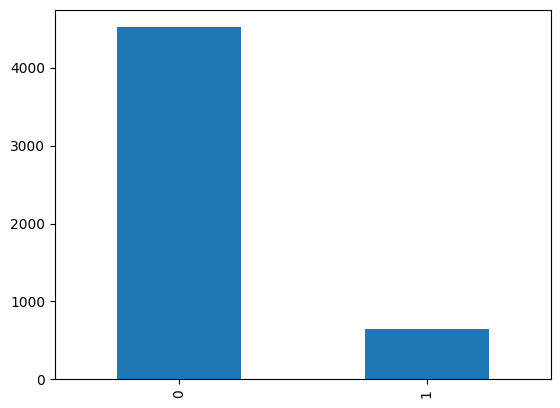

In [14]:
df['target'].value_counts().plot(kind='bar')

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
df['num_chars'] = df['text'].apply(len)
df

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [18]:
#num words logic
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.isnull().sum()

target       0
text         0
num_chars    0
num_words    0
dtype: int64

In [19]:
#sentence word logic
df['num_sent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
#ham describe
df[df['target'] == 0][['num_chars' , 'num_words' , 'num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
#spam describe
df[df['target'] == 1][['num_chars' , 'num_words' , 'num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [22]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

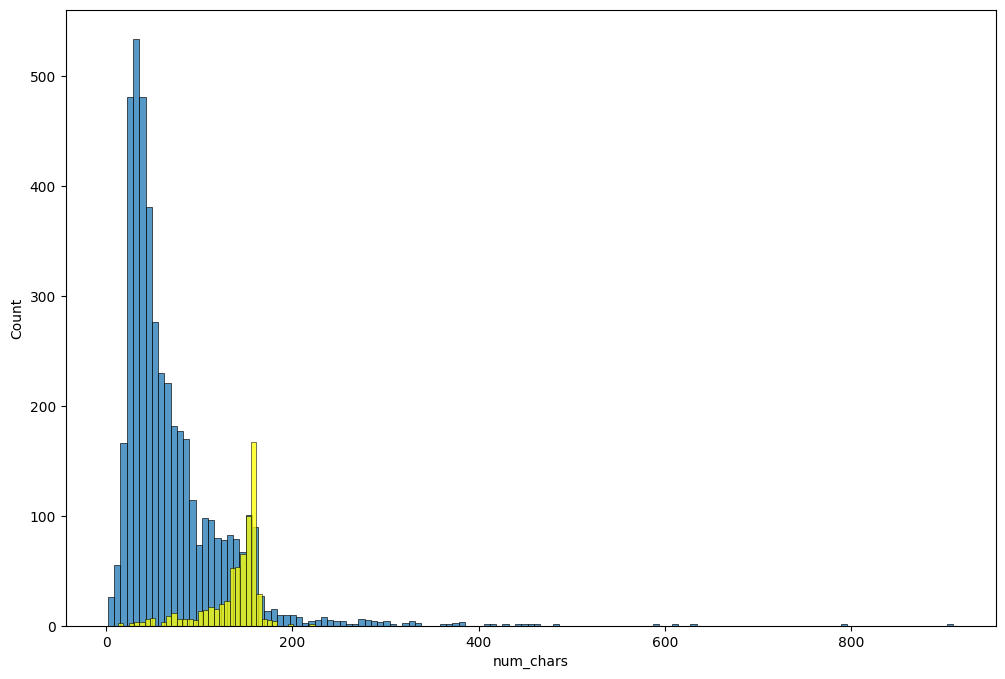

In [23]:
plt.figure(figsize = (12,8))
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color='yellow')

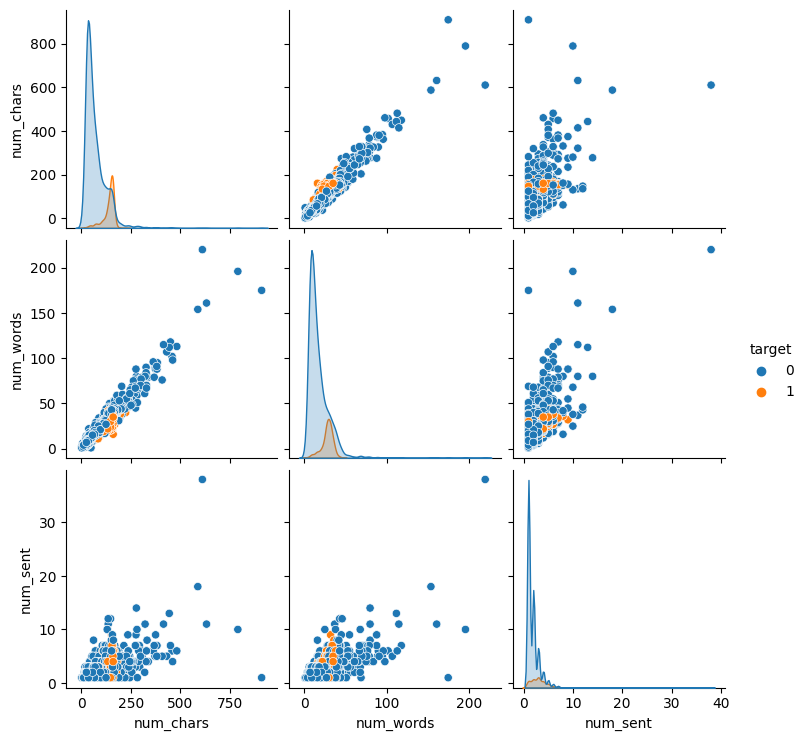

In [24]:
sns.pairplot(df, hue='target')

C:\Users\shara\AppData\Local\Temp\ipykernel_14060\3561066029.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

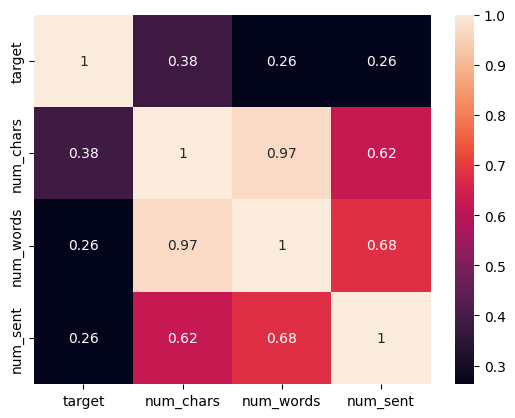

In [25]:
#correlation
sns.heatmap(df.corr(),annot=True)

## DATA TEXT PREPROCESSING
* Lower Casing
* Tokenization
* Removing Special Characters
* Remove Stop Words and Punctuations
* Stemming

In [26]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
english_stopwords = stopwords.words('english')

import string

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    res = []
    for char in text:
        if char.isalnum():
            res.append(char)
    
    text = res[:]
    res.clear()
    
    #removing stopwords
    for char in text:
        if char not in english_stopwords and char not in string.punctuation:
            res.append(char)
    
    text = res[:]
    res.clear()
    
    #handling stemming
    for char in text:
        res.append(ps.stem(char))
     
    return " ".join(res)

In [28]:
msg = "I loved the YT lectures on ML. How About YOU.?"
transform_text(msg)

'love yt lectur ml'

In [30]:
print(df['text'][0])
print(transform_text(df['text'][0]))

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [31]:
#now transform all your text
df['transformed'] = df['text'].apply(transform_text)

In [32]:
df.sample(10)

,target,text,num_chars,num_words,num_sent,transformed
2607,0,:-) yeah! Lol. Luckily i didn't have a starrin...,62,18,3,yeah lol luckili star role like
3844,0,Mmmm.... I cant wait to lick it!,32,9,2,mmmm cant wait lick
3239,0,A cute thought for friendship: \Its not necess...,90,17,1,cute thought friendship necessari share everi ...
3578,0,Multiply the numbers independently and count d...,126,23,1,multipli number independ count decim point div...
5172,0,"Aight, text me tonight and we'll see what's up",46,12,1,aight text tonight see
3625,0,Yeah right! I'll bring my tape measure fri!,43,11,2,yeah right bring tape measur fri
745,0,Dunno he jus say go lido. Same time 930.,40,11,2,dunno ju say go lido time 930
4914,0,We took hooch for a walk toaday and i fell ove...,134,30,5,took hooch walk toaday fell splat graze knee e...
212,0,K:)k:)good:)study well.,23,12,1,k k good studi well
5259,0,Can help u swoop by picking u up from wherever...,82,19,1,help u swoop pick u wherev ur bird r meet u want


#### LETS GENERATE WORD CLOUD TO SEE WHICH TEXT ARE COMMING MORE IN SPAM?HAM

In [78]:
#!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------------------------ --------------- 184.3/300.2 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from wordcloud import WordCloud
wc = WordCloud(width = 500 , height = 500 , min_font_size = 10 , background_color = 'white')

In [34]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed'].str.cat(sep = ""))

In [35]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed'].str.cat(sep = ""))

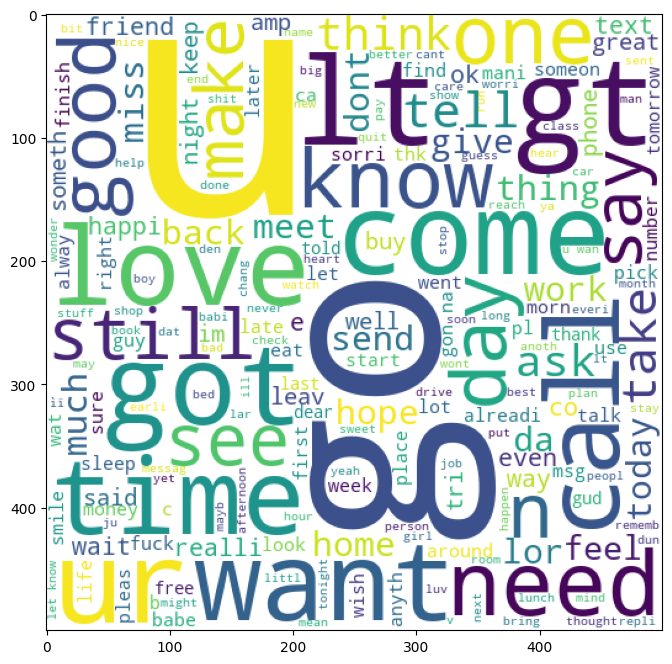

In [36]:
plt.figure(figsize = (12,8))
plt.imshow(ham_wc)

#### seeing top 30 words of ham and spam

In [37]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [38]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [39]:
len(spam_corpus)

9939

In [40]:
len(ham_corpus)

35404

In [41]:
#most frequent used 30 words in spam messages
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [42]:
#30 most frequently used in ham messages 
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


### NOW TO MODEL BUILDING
**WE USE NAIVE BAYES SINCE ITS BEST FOR TEXTUAL DATA

In [72]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [73]:
#converting to sparse matrix now
x = tf.fit_transform(df['transformed']).toarray()
x.shape

(5169, 6708)

In [74]:
#if we do y = df['target'] we get pandas DF as y
y = df['target'].values

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [77]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB , ComplementNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [78]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
cnb = ComplementNB()

In [79]:
#lets go for gaussianNB
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)

print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


***guassian gives poor precision , lets leave it

In [80]:
#lets go for MultinomialNB
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)

print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [81]:
#lets go for BernoulliNB
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)

print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [82]:
#lets go for ComplementNB
cnb.fit(X_train , y_train)
y_pred4 = cnb.predict(X_test)

print(accuracy_score(y_test , y_pred4))
print(confusion_matrix(y_test , y_pred4))
print(precision_score(y_test , y_pred4))

0.9361702127659575
[[835  54]
 [ 12 133]]
0.7112299465240641


In [83]:
import pickle
pickle.dump(tf,open('vectorizer.pkl' , 'wb'))

In [85]:
pickle.dump(mnb,open('model.pkl' , 'wb'))